# Linear Regression with Tensorflow

텐서플로어는 딥러닝 프레임워크로 유명합니다. 하지만 텐서플로어 그 자체는 딥러닝 뿐만 아니라 어떤 머신러닝 모델도 표현할 수 있는 강력한 도구입니다. 이 노트북에서는 텐서플로어로 간단한 선형 회귀 모델을 만들고 학습시켜 봅니다. 선형 회귀는 단순한 모델이지만, 모델을 세우고 학습시키는 원리는 어떤 거대한 딥러닝 모델에도 똑같이 적용됩니다. 이 튜토리얼을 통해 머신러닝 모델링의 일반적인 단계를 익힐 수 있을 것입니다.

## Overview
- 변수 정의하기
- 모델 세우기
- 목표 함수 만들기
- 최적화 방법 정하기
- 학습시키기

# Defining Variables

input/output data 및 parameter variables를 정의합니다.

## Data

In [1]:
import numpy as np

In [2]:
num_points = 1000
vectors_set = []
for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55) # 평균값을 0으로 갖고 표준편차가 0.55인 정규분포
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])

In [3]:
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

가상의 데이터를 만드는 과정입니다.

numpy 패키지를 불러오고 1000개의 데이터 포인트를 만듭니다. x1은 정규분포에서 만들어집니다. y1은 x1의 함수로 만들어지긴 하지만, 노이즈가 더해지므로 완전한 선형관계는 아닙니다.

vectors_set는 list of list, 즉 2차원 배열로 이루어져 있습니다. 2차원의 첫번째 요소를 x_data에 두번째 요소를 y_data로 저장합니다.

x, y 좌표에 x_data, y_data 를 사용하여 붉은색 원으로 산포도를 그립니다.

In [4]:
import matplotlib.pyplot as plt # 노트북 페이지에 그래프가 나타나도록 matplotlib magic command를 사용
%matplotlib inline

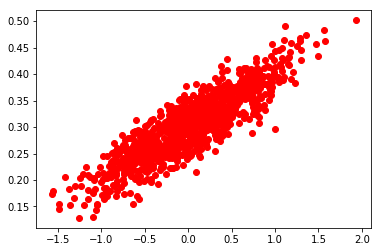

In [5]:
plt.plot(x_data, y_data, 'ro')

## Parameters

단순 선형 회귀 모델은 두가지 매개변수를 갖습니다. 기울기와 y절편이죠. 텐서플로어를 이용해 기울기 W와 절편 b를 정의합니다. 

$$ \hat{y} = W * x + b$$

텐서플로우 패키지를 로드합니다.

In [6]:
import tensorflow as tf

W와 b를 변수로 정의합니다. 변수로 정의하는 이유는 모델이 학습되며 변할 수 있는 값이기 때문입니다.

변수에는 초기값이 필요합니다. 가중치 W는 -1에서 1 사이의 랜덤한 균등분포 값으로 초기화하고, 절편 b는 0으로 초기화하도록 하죠. 텐서의 차원은 W와 b 모두 element가 하나인 1차원 텐서입니다.

In [7]:
W = tf.Variable(tf.random_uniform([1], -1, 1.0))
b = tf.Variable(tf.zeros([1]))

# Model Specification

이제 앞에서 정의된 변수를 이용해 모델을 세워봅시다. 단순 선형 회귀 모델에서 y는 다음과 같이 예측됩니다. 한 줄이면 충분하네요.

In [8]:
y = W * x_data + b

# Objective

모델을 세우는 것만큼이나 중요한 것이 모델을 '어떻게 평가하느냐'하는 것입니다. 머신러닝 모델에선 주로 얼마나 잘 맞췄는지가 아닌, 얼마나 틀렸는지를 측정합니다. 이렇게 측정된 값은 objective, cost, loss 등 많은 이름으로 불립니다. 모델의 cost는 parameters의 값에 따라 변하므로, parameters의 함수입니다.

선형 회귀 모델에서, 또 많은 regression 모델에서 가장 자주 쓰이는 objective function은 Mean Squared Error입니다. 우리도 이 objective를 쓰겠습니다.

$$ \frac{1}{n}\sum{(y - \hat{y})^2}$$

위 식을 텐서플로어로 표현하면 다음과 같습니다.

In [9]:
loss = tf.reduce_mean(tf.square(y - y_data))

# Optimizer

이제 obejcloss function을 정의했으므로, 이 함수를 최소화하는 parameters를 찾아내면 됩니다. 최적화 방법에도 여러가지가 있지만, 여기서는 학습속도 0.5인 그래디언트 디센트를 사용하겠습니다.

편리하게도 텐서플로어에서는 여러 최적화 기법들이 미리 구현되어 있으므로, 단 몇줄로 불러다 쓰시면 됩니다.

In [10]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# Training

이제 마지막 단계입니다. 변수 정의, 모델, 목표 함수, 최적화 방법까지 정해졌으므로 이제 데이터를 넣고 학습만 시키면 됩니다.

모든 변수를 초기화하고 세션을 시작합니다.

In [11]:
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)

8번 반복하면서 train을 실행시킵니다. 반복마다 W, b 값의 변화를 프린트하고 그래프로 직선의 기울기의 변화를 살펴봅니다.

step: 0, W: [ 0.51520771], b: [ 0.2800186], loss: 0.05591317266225815


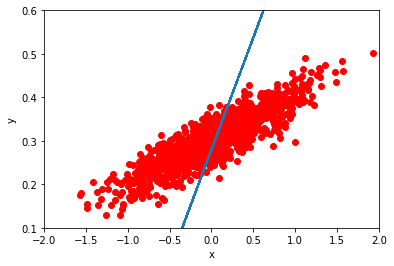

step: 1, W: [ 0.38349178], b: [ 0.2859804], loss: 0.026632752269506454


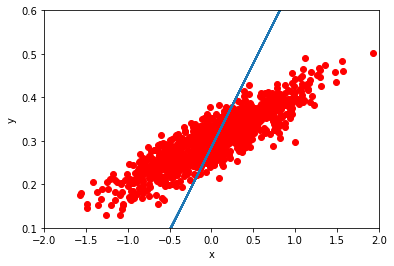

step: 2, W: [ 0.29337597], b: [ 0.29035985], loss: 0.012922655791044235


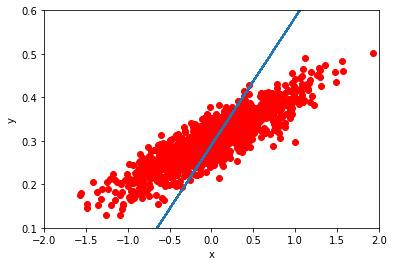

step: 3, W: [ 0.23171163], b: [ 0.29335615], loss: 0.006503082346171141


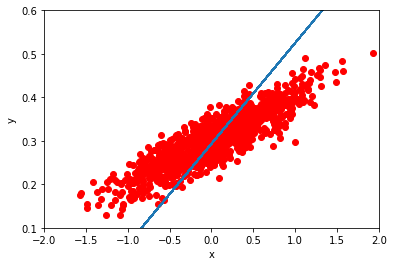

step: 4, W: [ 0.18951601], b: [ 0.29540646], loss: 0.0034971938002854586


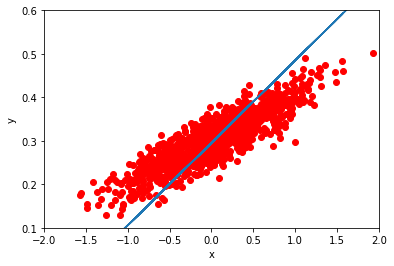

step: 5, W: [ 0.16064246], b: [ 0.29680943], loss: 0.002089725574478507


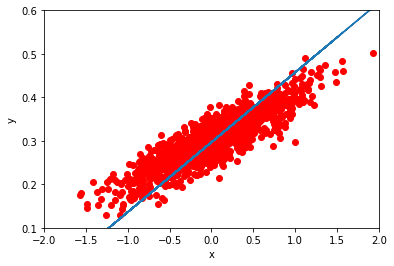

step: 6, W: [ 0.14088491], b: [ 0.29776946], loss: 0.0014306969242170453


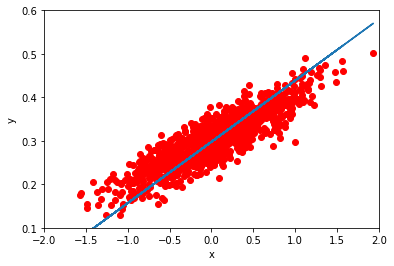

step: 7, W: [ 0.12736523], b: [ 0.29842636], loss: 0.0011221148306503892


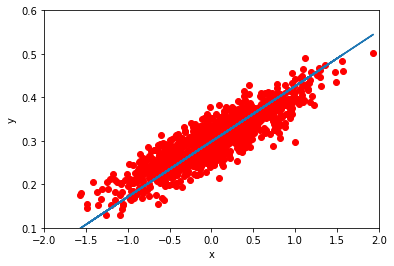

step: 8, W: [ 0.11811401], b: [ 0.2988759], loss: 0.00097762537188828


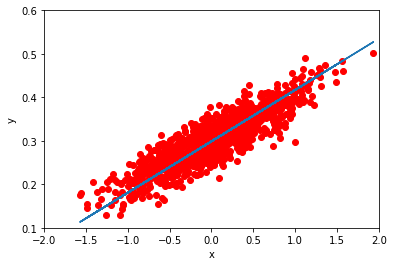

step: 9, W: [ 0.11178359], b: [ 0.29918349], loss: 0.0009099700837396085


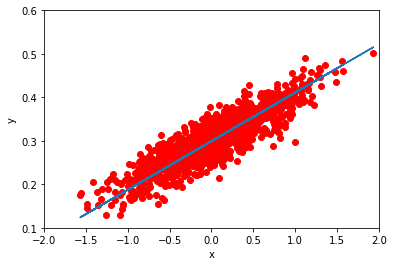

step: 10, W: [ 0.10745183], b: [ 0.29939398], loss: 0.0008782912627793849


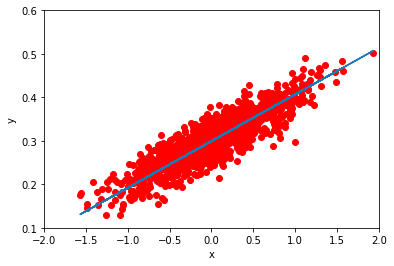

step: 11, W: [ 0.10448769], b: [ 0.29953799], loss: 0.000863458146341145


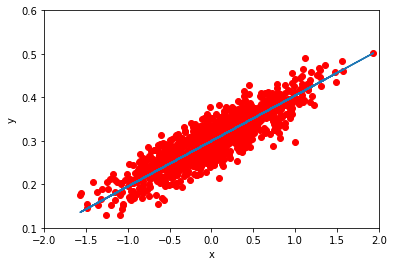

step: 12, W: [ 0.10245939], b: [ 0.29963654], loss: 0.0008565127500332892


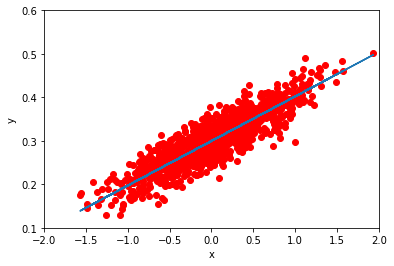

step: 13, W: [ 0.10107148], b: [ 0.29970399], loss: 0.000853260513395071


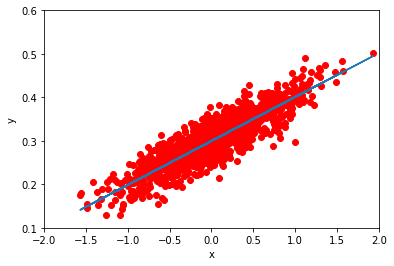

step: 14, W: [ 0.10012175], b: [ 0.29975015], loss: 0.000851737626362592


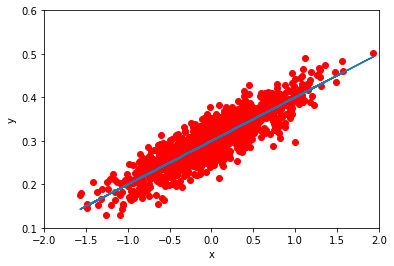

In [12]:
for step in range(15):
    sess.run(train)
    print("step: {}, W: {}, b: {}, loss: {}".format(step, 
                                                    sess.run(W), 
                                                    sess.run(b), 
                                                    sess.run(loss)))
    # 산포도 그리기
    plt.plot(x_data, y_data, 'ro')
    # 직선 그리기
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
    # x, y 축 레이블링을 하고 각 축의 최대, 최소값 범위를 지정합니다.
    plt.xlabel('x')
    plt.xlim(-2,2)
    plt.ylim(0.1,0.6)
    plt.ylabel('y')
    plt.show()